## Problem Statement

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [ ]:
import json
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the root directory of your Drive
drive_root = '/content/drive/My Drive'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# File path
f = '/content/drive/My Drive/TopicModelling/complaints-2021-05-14_08_16.json'

# Open and load the JSON file
with open(f, 'r') as file:
    data = json.load(file)

# Normalize the JSON data into a flat table
df = pd.json_normalize(data)

# Show the first few rows
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


## Data preparation

In [ ]:
# Inspect the dataframe to understand the given data.
# Check the dimensions of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Display column names
print("\nColumns in the DataFrame:")
print(df.columns.tolist())

# Display basic info about data types and non-null values
print("\nInfo:")
df.info()

# Display first few rows of data
print("\nFirst 5 rows:")
df.head()



Shape of the DataFrame: (78313, 22)

Columns in the DataFrame:
['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code', '_source.complaint_id', '_source.issue', '_source.date_received', '_source.state', '_source.consumer_disputed', '_source.product', '_source.company_response', '_source.company', '_source.submitted_via', '_source.date_sent_to_company', '_source.company_public_response', '_source.sub_product', '_source.timely', '_source.complaint_what_happened', '_source.sub_issue', '_source.consumer_consent_provided']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score             

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [ ]:
#print the column names
print(df.columns.tolist())


['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code', '_source.complaint_id', '_source.issue', '_source.date_received', '_source.state', '_source.consumer_disputed', '_source.product', '_source.company_response', '_source.company', '_source.submitted_via', '_source.date_sent_to_company', '_source.company_public_response', '_source.sub_product', '_source.timely', '_source.complaint_what_happened', '_source.sub_issue', '_source.consumer_consent_provided']


In [ ]:
#Assign new column names
df.rename(columns={
    '_index':'index',
    '_type':'type',
    '_id': 'id',
    '_score': 'score',
    '_source.complaint_what_happened': 'complaint_text',
    '_source.product': 'product',
    '_source.issue': 'issue',
    '_source.sub_issue': 'sub_issue',
    '_source.company': 'company',
    '_source.state': 'state',
    '_source.date_received': 'date_received',
    '_source.sub_product': 'sub_product',
    '_source.company_response': 'company_response',
    '_source.consumer_consent_provided': 'consumer_consent',
    '_source.zip_code': 'zip_code',
    '_source.submitted_via': 'submitted_via',
    '_source.date_sent_to_company': 'date_sent_to_company',
    '_source.timely': 'timely',
    '_source.company_public_response': 'company_public_response',
    '_source.consumer_disputed': 'consumer_disputed',
    '_source.complaint_id': 'complaint_id',
    '_source.tags': 'tags'
}, inplace=True)


In [ ]:
#Assign nan in place of blanks in the complaints column
df['complaint_text'] = df['complaint_text'].replace(r'^\s*$', np.nan, regex=True)

In [ ]:
#Remove all rows where complaints column is nan
df = df.dropna(subset=['complaint_text'])
print("Rows after dropping NaNs:", df.shape)
df = df.reset_index(drop=True)
df.head()

Rows after dropping NaNs: (21072, 22)


,index,type,id,score,tags,zip_code,complaint_id,issue,date_received,state,...,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_text,sub_issue,consumer_consent
0,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
1,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided
2,complaint-public-v2,complaint,3233499,0.0,None,104XX,3233499,Incorrect information on your report,2019-05-06T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-06T12:00:00-05:00,None,Other personal consumer report,Yes,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",Information belongs to someone else,Consent provided
3,complaint-public-v2,complaint,3180294,0.0,None,750XX,3180294,Incorrect information on your report,2019-03-14T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-03-15T12:00:00-05:00,None,Credit reporting,Yes,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chase Bank. I then immediately contacted Chase bank within no more than 10minutes of getting the notification on the screen and I was told by the Chase representative I spoke with that my application was denied but she could not state why. I asked for more information about the XXXX offer and she explained that even if I had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. I then explicitly told her I was glad I got denied and I was ABSOLUTELY no longer interested in the account. I asked that the application be withdrawn and the representative obliged. This all happened no later than 10mins after putting in the application on XX/XX/2018. Notwithstanding my explicit request not to proceed with the application and contrary to what I was told by the Chase representative, Chase did in fact go ahead to open a credit account in my name on XX/XX/2018. This is now being reported in my Credit Report and Chase has refused to correct this information on my credit report even though they went ahead to process an application which I did not consent to and out of their error.",Information belongs to someone else,Consent provi

## Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].


In [ ]:
# Write your function here to clean the text and remove all the unnecessary elements.
def clean_text_basic(text):
    if not isinstance(text, str):
        return ""

    # 1. Make lowercase
    text = text.lower()

    # 2. Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)

    # 3. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 4. Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
#Write your function to Lemmatize the texts
def lemmatize_text(text):
    if not isinstance(text, str):
        return ""

    doc = nlp(text)  # Process text with spacy

    # Join lemmas of all tokens
    lemmatized = " ".join([token.lemma_ for token in doc])

    return lemmatized


In [ ]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints
df['cleaned_text'] = df['complaint_text'].apply(clean_text_basic)
# Then lemmatize using batch processing
texts = df['cleaned_text'].tolist()

lemmatized_texts = []
for doc in nlp.pipe(texts, batch_size=50, disable=["parser", "ner"]):
    lemmas = " ".join([token.lemma_ for token in doc])
    lemmatized_texts.append(lemmas)

df['lemmatized_text'] = lemmatized_texts
#df['lemmatized_text'] = df['cleaned_text'].apply(lemmatize_text)
df_clean = df[['complaint_text', 'lemmatized_text']].copy()
df_clean.shape

(21072, 2)

In [ ]:
df_clean.head()

,complaint_text,lemmatized_text
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I be receive mail every month from they attempt to collect a debt I have a right to know this information as a consumer chase account xxxx xxxx xxxx xxxx thank in advance for your help
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,I upgrade my xxxx xxxx card in and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx have the recording of the agent who be mislead I
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",chase card be report on however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chase Bank. I then immediately contacted Chase bank within no more than 10minutes of getting the notification on the screen and I was told by the Chase representative I spoke with that my application was denied but she could not state why. I asked for more information about the XXXX offer and she explained that even if I had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. I then explicitly told her I was glad I got denied and I was ABSOLUTELY no longer interested in the account. I asked that the application be withdrawn and the representative obliged. This all happened no later than 10mins after putting in the application on XX/XX/2018. Notwithstanding my explicit request not to proceed with the application and contrary to what I was told by the Chase representative, Chase did in fact go ahead to open a credit account in my name on XX/XX/2018. This is now being reported in my Credit Report and Chase has refused to correct this information on my credit report even though they went ahead to process an application which I did not consent to and out of their error.",on while try to book a xxxx xxxx ticket I come across an offer for to be apply towards the ticket if I apply for a reward card I put in my information for the offer and within less than a minute be notify via the screen that a decision could not be make I immediately contact xxxx and be refer to chase bank I then immediately contact chase bank within no more than of get the notification on the screen and I 

In [ ]:
#Write your function to extract the POS tags

def pos_tag_filter_batch(texts):
    results = []
    for doc in nlp.pipe(texts, batch_size=64, disable=["ner", "parser"]):  # disable unused components
        filtered_tokens = [token.text for token in doc if token.tag_ == "NN"]
        results.append(" ".join(filtered_tokens))
    return results

# Apply the optimized batch function
df_clean['complaint_POS_removed'] = pos_tag_filter_batch(df_clean['lemmatized_text'].tolist())
df_clean.shape
#df_clean["complaint_POS_removed"] =  #this column should contain lemmatized text with all the words removed which have tags other than NN[tag == "NN"].


(21072, 3)

In [ ]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
# Set display options
pd.set_option('display.max_colwidth', None)  # Show full text in each column
pd.set_option('display.max_rows', 10)        # Optional: limit number of rows shown

# Display the dataframe
df_clean.shape
df_clean.head()



,complaint_text,lemmatized_text,complaint_POS_removed
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I be receive mail every month from they attempt to collect a debt I have a right to know this information as a consumer chase account xxxx xxxx xxxx xxxx thank in advance for your help,morning name stop service debt verification statement bank debt mail month debt right information consumer chase account advance help
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,I upgrade my xxxx xxxx card in and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx have the recording of the agent who be mislead I,card agent anniversary date agent information order account anniversary date consent recording agent mislead
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",chase card be report on however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,chase card report application identity consent service credit identity applicant
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chase Bank. I then immediately contacted Chase bank within no more than 10minutes of getting the notification on the screen and I was told by the Chase representative I spoke with that my application was denied but she could not state why. I asked for more information about the XXXX offer and she explained that even if I had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. I then explicitly told her I was glad I got denied and I was ABSOLUTELY no longer interested in the account. I asked that the application be withdrawn and the representative obliged. This all happened no later than 10mins after putting in the application on XX/XX/2018. Notwithstanding my explicit request not to proceed with the application and contrary to what I was told by the Chase representative, Chase did in fact go ahead to open a credit account in my name on XX/XX/2018. This is now being reported in my Credit Report and Chase has refused to correct this information on my credit report even though they went ahead to process an application which I did not consent to and out of their error.",on while try to book a xxxx xxxx ticket I come across an offer f

## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




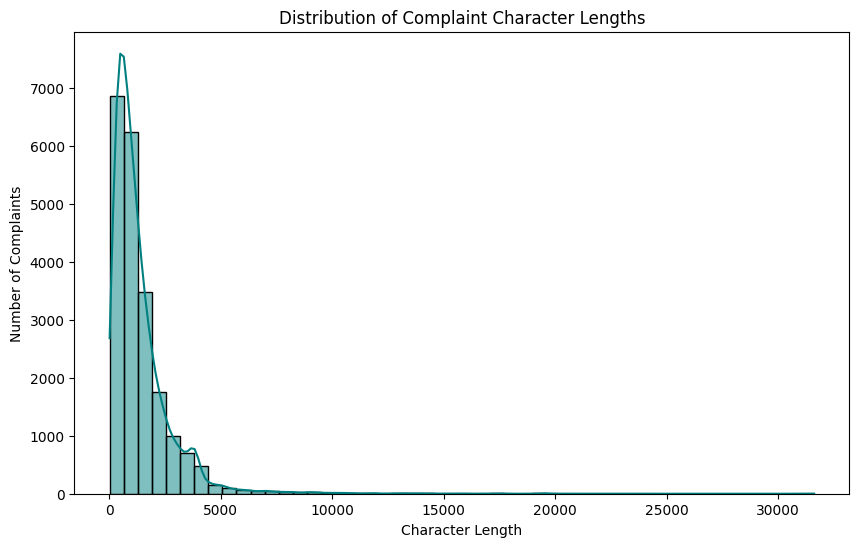

In [ ]:
# Write your code here to visualise the data according to the 'Complaint' character length
# Add a column for complaint character length
df_clean['complaint_length'] = df_clean['complaint_text'].str.len()

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['complaint_length'], bins=50, kde=True, color='teal')
plt.title('Distribution of Complaint Character Lengths')
plt.xlabel('Character Length')
plt.ylabel('Number of Complaints')
plt.show()

#### Find the top 40 words by frequency among all the articles after processing the text.

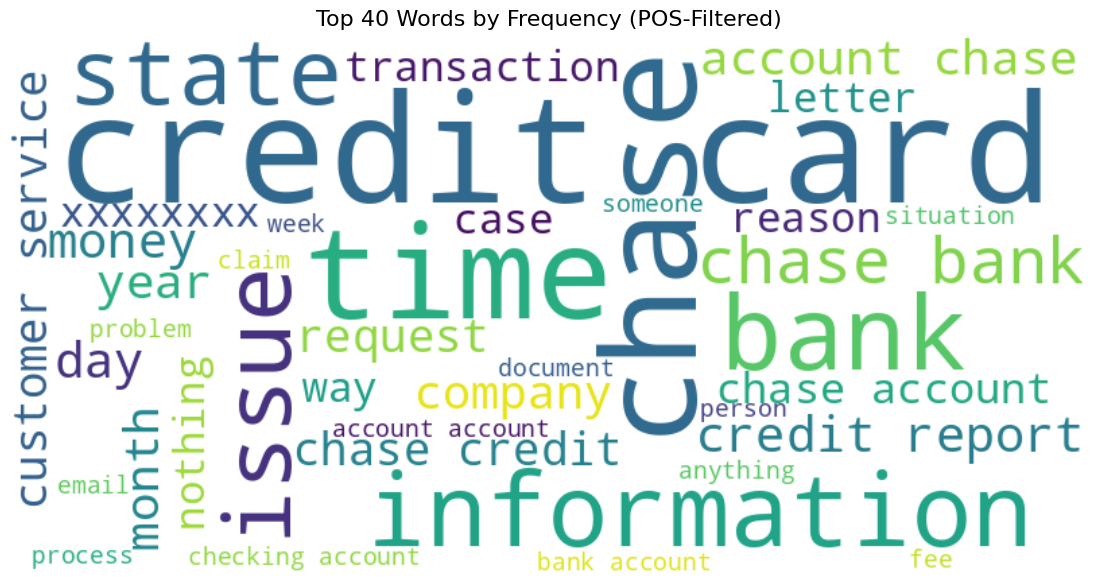

In [ ]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud

# Combine all filtered complaints into a single string
all_words = ' '.join(df_clean['complaint_POS_removed'].dropna())

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=40).generate(all_words)

# Display it
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words by Frequency (POS-Filtered)", fontsize=16)
plt.show()


In [ ]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [ ]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean).
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Prepare corpus - drop NaNs just in case
corpus = df_clean['Complaint_clean'].dropna()

# Initialize CountVectorizer for unigrams
vectorizer = CountVectorizer(ngram_range=(1,1), stop_words='english')  # remove English stopwords for better insight

# Fit and transform the corpus
X = vectorizer.fit_transform(corpus)

# Sum up the counts of each unigram (word)
word_counts = X.sum(axis=0).A1  # convert matrix to 1D array

# Map word to its count
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))

# Convert to DataFrame for easier sorting
df_word_freq = pd.DataFrame(word_freq.items(), columns=['word', 'count'])

# Sort descending and pick top 30
top30_unigrams = df_word_freq.sort_values(by='count', ascending=False).head(30)

print(top30_unigrams)


          word  count
2311     chase  59313
87     account  46969
3407    credit  33458
1993      card  30143
1221      bank  21388
...        ...    ...
2828   company   7527
2534     claim   7301
5911      fund   7021
13184    state   6607
5772     fraud   6564

[30 rows x 2 columns]


In [ ]:
#Print the top 10 words in the unigram frequency
print(top30_unigrams.head(10))

          word  count
2311     chase  59313
87     account  46969
3407    credit  33458
1993      card  30143
1221      bank  21388
9976   payment  21140
14020     time  15978
2279    charge  14715
3664       day  12904
8807     money  11921


In [ ]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean).
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Prepare corpus - drop NaNs just in case
corpus = df_clean['Complaint_clean'].dropna()

# Initialize CountVectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')  # remove English stopwords

# Fit and transform the corpus
X = vectorizer.fit_transform(corpus)

# Sum up the counts of each bigram
bigram_counts = X.sum(axis=0).A1

# Map bigram to its count
bigram_freq = dict(zip(vectorizer.get_feature_names_out(), bigram_counts))

# Convert to DataFrame for easier sorting
df_bigram_freq = pd.DataFrame(bigram_freq.items(), columns=['bigram', 'count'])

# Sort descending and pick top 30
top30_bigrams = df_bigram_freq.sort_values(by='count', ascending=False).head(30)

print(top30_bigrams)


                bigram  count
69683      credit card  12832
46426       chase bank   4069
70411    credit report   3950
1864     account chase   3522
46832     chase credit   3173
...                ...    ...
38004     card company   1136
2982    account number   1125
44836     charge chase   1119
186467   payment chase   1114
37898        card card   1105

[30 rows x 2 columns]


In [ ]:
#Print the top 10 words in the bigram frequency
for bigram, count in top30_bigrams.head(10).values:
    print(f"{bigram}: {count}")


credit card: 12832
chase bank: 4069
credit report: 3950
account chase: 3522
chase credit: 3173
customer service: 3061
chase account: 2849
checking account: 2457
bank account: 2451
account account: 2450


In [ ]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean).
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Prepare corpus - drop NaNs just in case
corpus = df_clean['Complaint_clean'].dropna()

# Initialize CountVectorizer for trigrams
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')  # remove English stopwords

# Fit and transform the corpus
X = vectorizer.fit_transform(corpus)

# Sum up the counts of each trigram
trigram_counts = X.sum(axis=0).A1

# Map trigram to its count
trigram_freq = dict(zip(vectorizer.get_feature_names_out(), trigram_counts))

# Convert to DataFrame for easier sorting
df_trigram_freq = pd.DataFrame(trigram_freq.items(), columns=['trigram', 'count'])

# Sort descending and pick top 30
top30_trigrams = df_trigram_freq.sort_values(by='count', ascending=False).head(30)

print(top30_trigrams)


                       trigram  count
151079       chase credit card   2142
224944     credit card account   1096
225153     credit card company    997
225118       credit card chase    839
151533  chase customer service    616
...                        ...    ...
230769     credit report chase    254
742505   victim identity theft    249
524654     payment credit card    240
225866     credit card service    230
343188     freedom credit card    229

[30 rows x 2 columns]


In [ ]:
#Print the top 10 words in the trigram frequency
for trigram, count in top30_trigrams.head(10).values:
    print(f"{trigram}: {count}")


chase credit card: 2142
credit card account: 1096
credit card company: 997
credit card chase: 839
chase customer service: 616
credit card credit: 528
inquiry credit report: 513
chase bank account: 445
account credit card: 436
charge credit card: 416


## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [ ]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [ ]:
#All masked texts has been removed
df_clean.shape
df_clean.head()

,complaint_text,lemmatized_text,complaint_POS_removed,complaint_length,Complaint_clean
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I be receive mail every month from they attempt to collect a debt I have a right to know this information as a consumer chase account xxxx xxxx xxxx xxxx thank in advance for your help,morning name stop service debt verification statement bank debt mail month debt right information consumer chase account advance help,486,morning name stop service debt verification statement bank debt mail month debt right information consumer chase account advance help
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,I upgrade my xxxx xxxx card in and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx have the recording of the agent who be mislead I,card agent anniversary date agent information order account anniversary date consent recording agent mislead,355,card agent anniversary date agent information order account anniversary date consent recording agent mislead
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",chase card be report on however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,chase card report application identity consent service credit identity applicant,224,chase card report application identity consent service credit identity applicant
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chase Bank. I then immediately contacted Chase bank within no more than 10minutes of getting the notification on the screen and I was told by the Chase representative I spoke with that my application was denied but she could not state why. I asked for more information about the XXXX offer and she explained that even if I had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. I then explicitly told her I was glad I got denied and I was ABSOLUTELY no longer interested in the account. I asked that the application be withdrawn and the representative obliged. This all happened no later than 10mins after putting in the application on XX/XX/2018. Notwithstanding my explicit request not to proceed with the application and contrary to what I was told by the Chase representati

## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [ ]:
#Write your code here to initialise the TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.95, min_df=2)


#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [ ]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm = tfidf.fit_transform(df_clean['Complaint_clean'])

In [ ]:
tfidf.get_feature_names_out()

array(['aa', 'aarp', 'abandonment', ..., 'zipcode', 'zombie', 'zone'],
      dtype=object)

## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints
* Correct the labels if needed
* Map the clusters to topics/cluster names

In [ ]:
from sklearn.decomposition import NMF

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [ ]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5

#keep the random_state =40
nmf_model =  NMF(n_components=num_topics, random_state=40)

In [ ]:
nmf_model.fit(dtm)
len(tfidf.get_feature_names_out())
feature_names = tfidf.get_feature_names_out()

In [ ]:
#Print the Top15 words for each of the topics
for index, topic in enumerate(nmf_model.components_):
    print(f"\nTOPIC #{index}")
    top_words = [feature_names[i] for i in topic.argsort()[-15:]]  # top 15 words
    print(", ".join(top_words))


TOPIC #0
claim, transfer, transaction, business, number, checking, day, branch, deposit, fund, chase, money, bank, check, account

TOPIC #1
year, reporting, letter, application, limit, information, debt, company, score, chase, account, inquiry, report, card, credit

TOPIC #2
account, credit, chase, date, auto, bill, time, day, amount, statement, fee, interest, month, balance, payment

TOPIC #3
interest, email, amount, time, service, claim, fraud, merchant, purchase, fee, dispute, transaction, chase, card, charge

TOPIC #4
request, sale, house, rate, foreclosure, time, document, letter, year, property, modification, home, chase, mortgage, loan


In [ ]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
topic_values = nmf_model.transform(dtm)
print(topic_values.shape)
import pandas as pd

# Convert to DataFrame for easier viewing (optional)
topic_values_df = pd.DataFrame(topic_values, columns=[f'Topic_{i}' for i in range(nmf_model.n_components)])
print(topic_values_df.shape)
# Print all topic values
print(topic_values_df)

(21072, 5)
(21072, 5)
        Topic_0   Topic_1   Topic_2   Topic_3   Topic_4
0      0.020092  0.015065  0.008397  0.004700  0.023444
1      0.007136  0.008579  0.001103  0.011943  0.004101
2      0.000000  0.065061  0.000000  0.006164  0.003883
3      0.018571  0.064209  0.000000  0.008608  0.021839
4      0.072285  0.000000  0.000000  0.006295  0.011115
...         ...       ...       ...       ...       ...
21067  0.000000  0.047855  0.018620  0.064280  0.000000
21068  0.007975  0.005284  0.000000  0.037264  0.011715
21069  0.013934  0.010901  0.000000  0.024269  0.010303
21070  0.000000  0.039220  0.096481  0.034192  0.000000
21071  0.028806  0.037284  0.095745  0.004399  0.003791

[21072 rows x 5 columns]


In [ ]:
#Assign the best topic to each of the cmplaints in Topic Column
df_clean['Topic'] = topic_values.argmax(axis=1)
print(df_clean.shape)

(21072, 6)


In [ ]:
df_clean.head()

,complaint_text,lemmatized_text,complaint_POS_removed,complaint_length,Complaint_clean,Topic
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I be receive mail every month from they attempt to collect a debt I have a right to know this information as a consumer chase account xxxx xxxx xxxx xxxx thank in advance for your help,morning name stop service debt verification statement bank debt mail month debt right information consumer chase account advance help,486,morning name stop service debt verification statement bank debt mail month debt right information consumer chase account advance help,4
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,I upgrade my xxxx xxxx card in and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx have the recording of the agent who be mislead I,card agent anniversary date agent information order account anniversary date consent recording agent mislead,355,card agent anniversary date agent information order account anniversary date consent recording agent mislead,3
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",chase card be report on however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,chase card report application identity consent service credit identity applicant,224,chase card report application identity consent service credit identity applicant,1
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chase Bank. I then immediately contacted Chase bank within no more than 10minutes of getting the notification on the screen and I was told by the Chase representative I spoke with that my application was denied but she could not state why. I asked for more information about the XXXX offer and she explained that even if I had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. I then explicitly told her I was glad I got denied and I was ABSOLUTELY no longer interested in the account. I asked that the application be withdrawn and the representative obliged. This all happened no later than 10mins after putting in the application on XX/XX/2018. Notwithstanding my explicit request not to proceed with the application and contrary to what I was told by the Chase 

In [ ]:
#Print the first 5 Complaint for each of the Topics
df_sample = df_clean.groupby('Topic').head(5)
df_sample.sort_values('Topic')


,complaint_text,lemmatized_text,complaint_POS_removed,complaint_length,Complaint_clean,Topic
6,"With out notice J.P. Morgan Chase restricted my account by my debit card Tuesday XX/XX/2019. On Thursday XX/XX/2019 I went into A branch after being advised by a customer service representative that my account would actually be closed. I went into the branch to see how I can remove the funds that are in there currently in as well as if my direct deposit from my place of employment would be returned. The bank associate and the customer service representative assured me that the funds would Post but they may take an additional business day. That Saturday I attempted to go inside of a branch yet again to retrieve my funds that actually did post on Friday, XX/XX/2019. Upon looking at my account I realize that the funds have been reversed and no longer were present on my current statement. Ive been called and I was told that it may take two business day stating Tuesday, XX/XX/XXXX would be the date that my funds would be available to withdraw from a bank teller only. Now, Chase is informing me that I will be mailed a check into the three business days to recover the funds that are owed to me and left in my account currently. Unfortunately, This has put me in an additional financial bind do two fees from late rent late car payments, etc. I am not being a short or giving written notice that these things will actually occur so that I have peace of mind in fact Chase has handled my situation grossly I even had a bank teller inform me that my account looks suspicious after giving me a suspicious look myself. Although I know that Chase reserves the right to close my account at any time I do believe that their protocol has been in the past to give notice in the form of a written document. I am not being a shored or giving written notice that these things will actually occur so that I have peace of mind in fact Chase has handled my situation grossly I even had a bank teller inform me that my account looks suspicious after giving me a suspicious look myself. Although I know that Chase reserves the right to close my account at any time I do believe that their protocol has been in the past to give notice in the form of a written document. This situation is truly affecting my livelihood and they dont seem to want to deal with Me professionally. Thank you",with out notice jp morgan chase restrict my account by my debit card tuesday on thursday I go into a branch after be advise by a customer service representative that my account would actually be close I go into the branch to see how I can remove the fund that be in there currently in as well as if my direct deposit from my place of employment would be return the bank associate and the customer service representative assure I that the fund would post but they may take an additional business day that saturday I attempt to go inside of a branch yet again to retrieve my fund that actually do post on friday upon look at my account I realize that the fund have be reverse and no long be present on my current statement I ve be call and I be tell that it may take two business day state tuesday xxxxxxxx would be the date that my fund would be available to withdraw from a bank teller only now chase be inform I that I will be mail a check into the three business day to recover the fund that be owe to I and leave in my account currently unfortunately this have put I in an additional financial bind do two fee from late rent late car payment etc I be not be a short or give write notice that these thing will actually occur so that I have peace of mind in fact chase have handle my situation grossly I even have a bank teller inform I that my account look suspicious after give I a suspicious look myself although I know that chase reserve the right to close my account at any time I do believe that their protocol have be in the past to give notice in the form of a write document I be not be a shore or give write notice

In [ ]:
df_clean.shape

(21072, 6)

#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [ ]:
#Create the dictionary of Topic names and Topics

Topic_names = {
    0: "Bank Account services",       # TOPIC #1 (account, check, money, bank)
    1: "Credit card or prepaid card", # TOPIC #2 (credit, card, report, debt)
    2: "Others",                      # TOPIC #3 (payment, statement, date)
    3: "Theft/Dispute Reporting",     # TOPIC #4 (fraud, dispute, charge)
    4: "Mortgage/Loan"                # TOPIC #5 (mortgage, home, loan)
}
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [ ]:
df_clean.head()

,complaint_text,lemmatized_text,complaint_POS_removed,complaint_length,Complaint_clean,Topic
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I be receive mail every month from they attempt to collect a debt I have a right to know this information as a consumer chase account xxxx xxxx xxxx xxxx thank in advance for your help,morning name stop service debt verification statement bank debt mail month debt right information consumer chase account advance help,486,morning name stop service debt verification statement bank debt mail month debt right information consumer chase account advance help,Mortgage/Loan
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,I upgrade my xxxx xxxx card in and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx have the recording of the agent who be mislead I,card agent anniversary date agent information order account anniversary date consent recording agent mislead,355,card agent anniversary date agent information order account anniversary date consent recording agent mislead,Theft/Dispute Reporting
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",chase card be report on however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,chase card report application identity consent service credit identity applicant,224,chase card report application identity consent service credit identity applicant,Credit card or prepaid card
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chase Bank. I then immediately contacted Chase bank within no more than 10minutes of getting the notification on the screen and I was told by the Chase representative I spoke with that my application was denied but she could not state why. I asked for more information about the XXXX offer and she explained that even if I had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. I then explicitly told her I was glad I got denied and I was ABSOLUTELY no longer interested in the account. I asked that the application be withdrawn and the representative obliged. This all happened no later than 10mins after putting in the application on XX/XX/2018. Notwithstanding my explicit request not to proceed with t

## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [ ]:
df_clean_backup = df_clean.copy(deep=True)
df_clean_backup.shape

(21072, 6)

In [ ]:
#Create the dictionary again of Topic names and Topics
Inverted_Topic_names = {v: k for k, v in Topic_names.items()}
df_clean['Topic'] = df_clean['Topic'].map(Inverted_Topic_names)


In [ ]:
df_clean.head()

,complaint_text,lemmatized_text,complaint_POS_removed,complaint_length,Complaint_clean,Topic
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I be receive mail every month from they attempt to collect a debt I have a right to know this information as a consumer chase account xxxx xxxx xxxx xxxx thank in advance for your help,morning name stop service debt verification statement bank debt mail month debt right information consumer chase account advance help,486,morning name stop service debt verification statement bank debt mail month debt right information consumer chase account advance help,4
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,I upgrade my xxxx xxxx card in and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx have the recording of the agent who be mislead I,card agent anniversary date agent information order account anniversary date consent recording agent mislead,355,card agent anniversary date agent information order account anniversary date consent recording agent mislead,3
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",chase card be report on however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,chase card report application identity consent service credit identity applicant,224,chase card report application identity consent service credit identity applicant,1
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chase Bank. I then immediately contacted Chase bank within no more than 10minutes of getting the notification on the screen and I was told by the Chase representative I spoke with that my application was denied but she could not state why. I asked for more information about the XXXX offer and she explained that even if I had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. I then explicitly told her I was glad I got denied and I was ABSOLUTELY no longer interested in the account. I asked that the application be withdrawn and the representative obliged. This all happened no later than 10mins after putting in the application on XX/XX/2018. Notwithstanding my explicit request not to proceed with the application and contrary to what I was told by the Chase 

In [ ]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data = df_clean[['complaint_text', 'Topic']].copy()

In [ ]:
training_data.head(5)

,complaint_text,Topic
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,4
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,3
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",1
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chase Bank. I then immediately contacted Chase bank within no more than 10minutes of getting the notification on the screen and I was told by the Chase representative I spoke with that my application was denied but she could not state why. I asked for more information about the XXXX offer and she explained that even if I had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. I then explicitly told her I was glad I got denied and I was ABSOLUTELY no longer interested in the account. I asked that the application be withdrawn and the representative obliged. This all happened no later than 10mins after putting in the application on XX/XX/2018. Notwithstanding my explicit request not to proceed with the application and contrary to what I was told by the Chase representative, Chase did in fact go ahead to open a credit account in my name on XX/XX/2018. This is now being reported in my Credit Report and Chase has refused to correct this information on my credit report even though they went ahead to process an application which I did not consent to and out of their error.",1
4,my grand son give me check for {$1600.00} i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase 2 times they told him i should call not him to verify the check owner he is out the country most the time date happen XX/XX/2018 check number XXXX claim number is XXXX with chase,0


####Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

X = training_data['complaint_text']
y = training_data['Topic']

# Write your code to get the Vector count
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X)

# Write your code here to transform the word vector to tf-idf
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

# Create train & test data using train_test_split on the tf-idf features and topics
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)

In [ ]:
print("DF:", df_clean.shape)
print("Train:", training_data.shape)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Since X_train and X_test are sparse matrices, let's print the first row dense vector for each



DF: (21072, 6)
Train: (21072, 2)
X_train shape: (16857, 29725)
y_train shape: (16857,)
X_test shape: (4215, 29725)
y_test shape: (4215,)


You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [ ]:
# Write your code here to build any 3 models and evaluate them using the required metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 1: Build the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Step 2: Train the model
log_reg.fit(X_train, y_train)

# Step 3: Predict on the test set
y_pred = log_reg.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
print("Logistic Regression Performance:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Optional: Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))





Logistic Regression Performance:
Accuracy:  0.9222
Precision: 0.9230
Recall:    0.9222
F1 Score:  0.9221

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1047
           1       0.94      0.90      0.92       885
           2       0.94      0.86      0.90       457
           3       0.89      0.94      0.91      1106
           4       0.93      0.93      0.93       720

    accuracy                           0.92      4215
   macro avg       0.93      0.91      0.92      4215
weighted avg       0.92      0.92      0.92      4215



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 1: Build the Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)

# Step 2: Train the model
dtree.fit(X_train, y_train)

# Step 3: Predict on the test set
y_pred = dtree.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("Decision Tree Performance:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Decision Tree Performance:
Accuracy:  0.7832
Precision: 0.7835
Recall:    0.7832
F1 Score:  0.7832

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1047
           1       0.81      0.80      0.81       885
           2       0.74      0.76      0.75       457
           3       0.76      0.75      0.76      1106
           4       0.79      0.81      0.80       720

    accuracy                           0.78      4215
   macro avg       0.78      0.78      0.78      4215
weighted avg       0.78      0.78      0.78      4215



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 1: Build the Random Forest model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Step 2: Train the model
rf.fit(X_train, y_train)

# Step 3: Predict on the test set
y_pred = rf.predict(X_test)

# Step 4: Evaluate the model with zero_division=0 to avoid warnings
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("Random Forest Performance:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Random Forest Performance:
Accuracy:  0.8280
Precision: 0.8356
Recall:    0.8280
F1 Score:  0.8233

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1047
           1       0.85      0.83      0.84       885
           2       0.93      0.49      0.65       457
           3       0.77      0.86      0.81      1106
           4       0.89      0.87      0.88       720

    accuracy                           0.83      4215
   macro avg       0.85      0.79      0.81      4215
weighted avg       0.84      0.83      0.82      4215



# Summary of Supervised Model Performance  
*(Overall performance)*

| Metric    | Random Forest | Decision Tree | Logistic Regression |
|-----------|---------------|---------------|---------------------|
| Precision | 0.836         | 0.784         | 0.923               |
| Recall    | 0.828         | 0.783         | 0.922               |
| F1-score  | 0.823         | 0.783         | 0.922               |
| Accuracy  | 0.828         | 0.783         | 0.922               |

---

# Model Performance Summary  
*(Class-wise metrics)*

| Class | Metric    | Random Forest | Decision Tree | Logistic Regression |
|-------|-----------|---------------|---------------|---------------------|
| 0     | Precision | 0.82          | 0.80          | 0.93                |
|       | Recall    | 0.91          | 0.79          | 0.94                |
|       | F1-score  | 0.86          | 0.79          | 0.94                |
| 1     | Precision | 0.85          | 0.81          | 0.94                |
|       | Recall    | 0.83          | 0.80          | 0.90                |
|       | F1-score  | 0.84          | 0.81          | 0.92                |
| 2     | Precision | 0.93          | 0.74          | 0.94                |
|       | Recall    | 0.49          | 0.76          | 0.86                |
|       | F1-score  | 0.65          | 0.75          | 0.90                |
| 3     | Precision | 0.77          | 0.76          | 0.89                |
|       | Recall    | 0.86          | 0.75          | 0.94                |
|       | F1-score  | 0.81          | 0.76          | 0.91                |
| 4     | Precision | 0.89          | 0.79          | 0.93                |
|       | Recall    | 0.87          | 0.81          | 0.93                |
|       | F1-score  | 0.88          | 0.80          | 0.93                |

---

# Recommendation

Based on the overall and class-wise performance metrics, **Logistic Regression** is the best model for this classification task. It consistently shows higher precision, recall, F1-score, and accuracy across most classes compared to Random Forest and Decision Tree models. This suggests that Logistic Regression provides more balanced and reliable predictions, making it the preferred choice for deployment.

However, depending on specific use cases or computational constraints, Random Forest can be considered as an alternative due to its robustness and slightly better recall in some classes, while Decision Tree offers simplicity but with lower overall performance.
